<a href="https://colab.research.google.com/github/jbEmanuel/German_Credit_Risk_Classification/blob/main/German_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
description = pd.read_csv('/content/DataDescription.csv')
description.head(21)

,Column Name,Variable Name,Content
0,laufkont,status,status of the debtor's checking account with t...
1,laufzeit,duration,credit duration in months (quantitative)
2,moral,credit_history,history of compliance with previous or concurr...
3,verw,purpose,purpose for which the credit is needed (catego...
4,hoehe,amount,credit amount in DM (quantitative; result of m...
5,sparkont,savings,debtor's savings (categorical)
6,beszeit,employment_duration,duration of debtor's employment with current e...
7,rate,installment_rate,credit installments as a percentage of debtor'...
8,famges,personal_status_sex,combined information on sex and marital status...
9,buerge,other_debtors,Is there another debtor or a guarantor for the...


# 1. Gathering the Dataset

In [ ]:
colunas = ['id', 'status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

In [ ]:
data = pd.read_csv('/content/train.csv')
data.columns = colunas
data.head()

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1,1


## 1.1 Exploratory Data Analysis

In [ ]:
df = data.copy()
df.drop(["id"], axis = 1, inplace = True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status,800.0,2.64875,1.250931,1.0,1.75,2.0,4.00,4.0
duration,800.0,20.49625,12.006881,4.0,12.00,18.0,24.00,72.0
credit_history,800.0,2.58250,1.099866,0.0,2.00,2.0,4.00,4.0
purpose,800.0,2.78500,2.680533,0.0,1.00,2.0,3.00,10.0
amount,800.0,3210.29000,2792.840814,250.0,1364.00,2264.0,3907.25,18424.0
savings,800.0,2.14375,1.589416,1.0,1.00,1.0,3.00,5.0
employment_duration,800.0,3.39500,1.224070,1.0,3.00,3.0,5.00,5.0
installment_rate,800.0,2.95250,1.134395,1.0,2.00,3.0,4.00,4.0
personal_status_sex,800.0,2.68750,0.696743,1.0,2.00,3.0,3.00,4.0
other_debtors,800.0,1.14375,0.472615,1.0,1.00,1.0,1.00,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e529a6d90>,
      dtype=object)

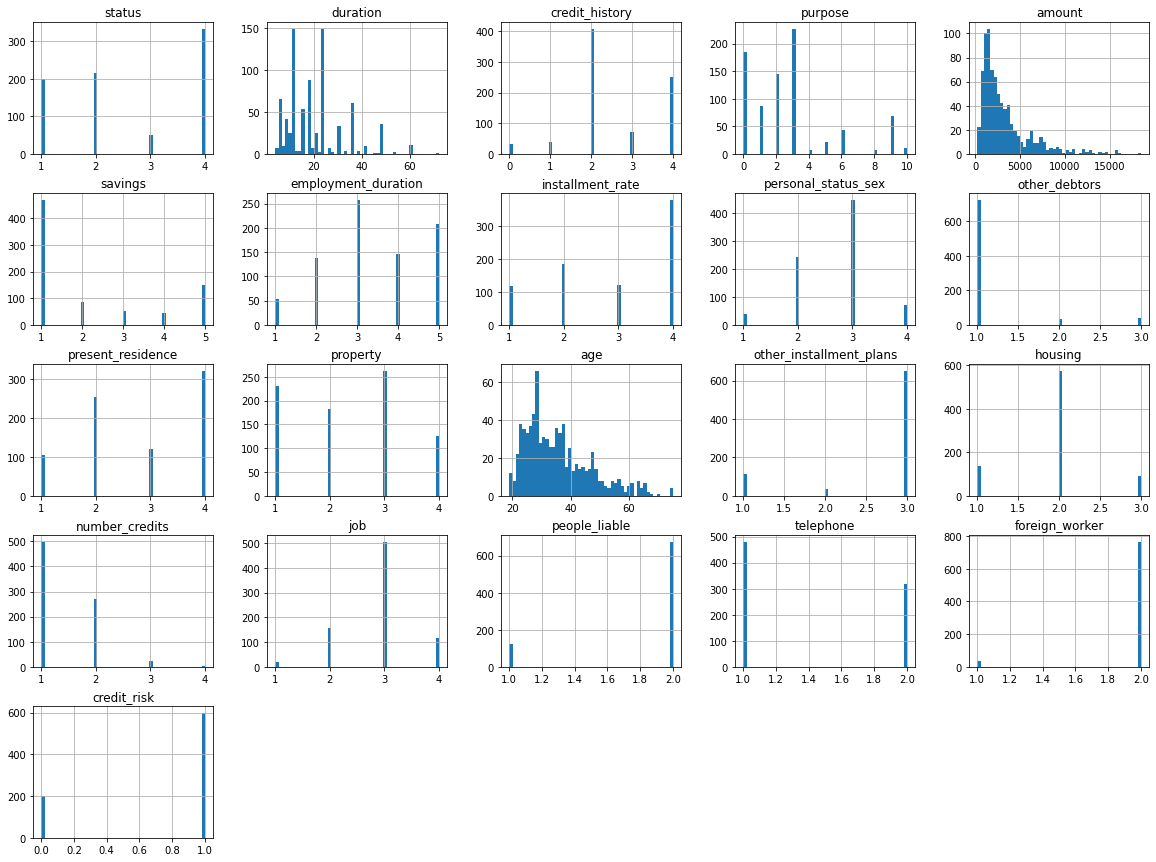

In [ ]:
df.hist(bins=50, figsize=(20,15))

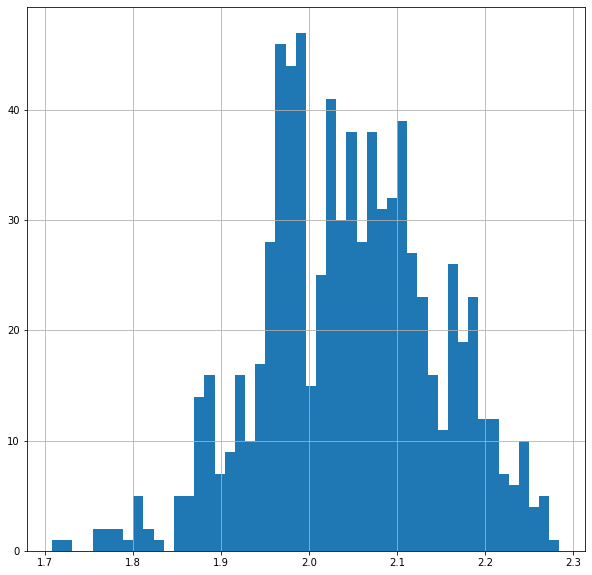

In [ ]:
data['amount'] = [np.log(x) for x in data['amount']]
data['amount'].hist(bins = 50,figsize=(10,10))

In [ ]:
def box_plot(df):
  if df.dtypes == object:
    df = pd.to_numeric(df,errors = 'coerce')
  plt.figure(figsize=(10,4))
  sns.boxplot(df)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


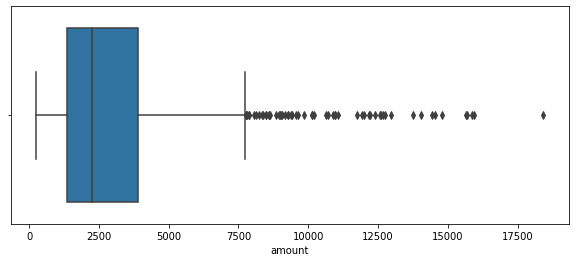

In [ ]:
box_plot(data['amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


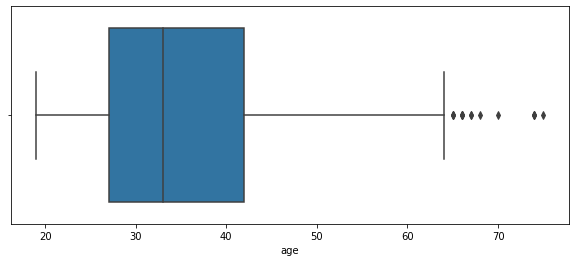

In [ ]:
box_plot(data['age'])

#### Identifie the outliers in Age and Amount

In [ ]:
def outliers(df):
  LB = []
  UB = []
  uper_bound = df.mean() + 3*df.std()
  lower_bound = df.mean() - 3*df.std()
  for x in df:
    if x <= lower_bound:
      LB.append(x)
    if x >= uper_bound:
      UB.append(x)
  return LB, UB, uper_bound 

In [ ]:
def indicies_of_outliers(df):
  LB = []
  UB = []
  q1, q3 = np.percentile(df, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  for x in df:
    if x <= lower_bound:
      LB.append(x)
    if x >= upper_bound:
      UB.append(x)
  return LB, UB, upper_bound 

In [ ]:
x, y, z = indicies_of_outliers(data['age'])
x, y, z

([], [65, 74, 74, 74, 65, 66, 68, 66, 70, 67, 66, 75, 67, 65, 66], 64.5)

In [ ]:
df = data.copy()
#df.loc[df['age'] >= z,'age'] =z
df["Outlier"] = np.where(df["age"] > z,1,0)

In [ ]:
df['Outlier'].value_counts()

0    785
1     15
Name: Outlier, dtype: int64

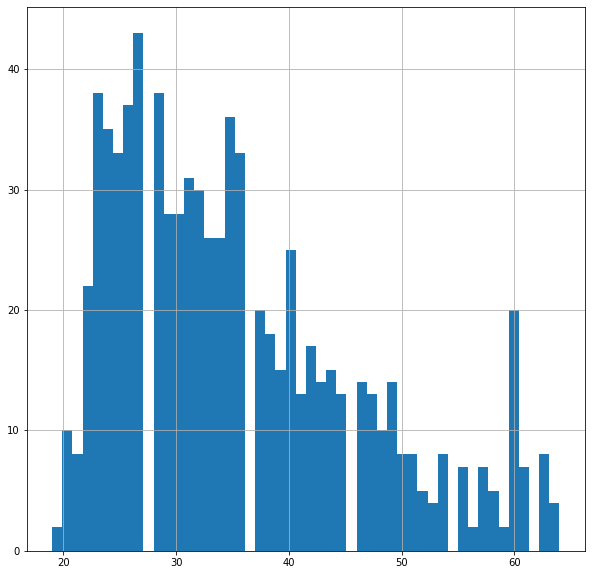

In [ ]:
df['age'].hist(bins=50, figsize=(10,10))

In [ ]:
df['age'].describe()

count    800.000000
mean      35.515435
std       11.087950
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       69.069673
Name: age, dtype: float64

###Dealing with Age and Amount with Box Cox

In [ ]:
fitted_data, fitted_lambda = stats.boxcox(data['amount'])
fitted_lambda

-0.06687707752285876

In [ ]:
df = pd.DataFrame(fitted_data, columns=['amount'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8e4820050>]],
      dtype=object)

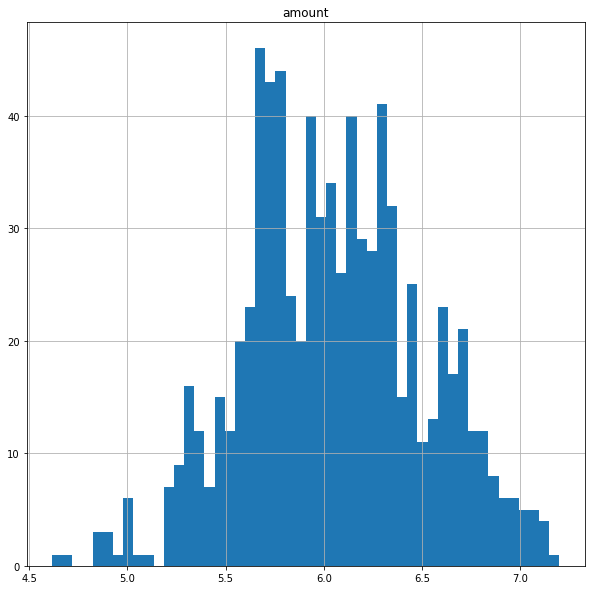

In [ ]:
df.hist(bins=50, figsize=(10,10))

# 2. Target Definition

## 2.1 Criar conjunto de treino e de teste

In [ ]:
X = data.drop(["credit_risk", "id"], axis = 1) 
y = data['credit_risk']
X.shape, y.shape

((800, 20), (800,))

In [ ]:
from sklearn.preprocessing import RobustScaler
stdsc = RobustScaler()
X_std = stdsc.fit_transform(X)
#X_test_std_r = stdsc.transform(X_test)

X_test = pd.read_csv('/content/test.csv')
X_test = X_test.drop("Id", axis = 1)



In [ ]:
svc= SVC(kernel='rbf', C=1.0, random_state=71, gamma = 0.2)
svc.fit(X_std, y)
y_pred_svc = svc.predict(X_test)
y = pd.DataFrame()
y['kredit'] = y_pred_svc
y['Id'] = range(0,len(list(y_pred_svc)))
y.to_csv('submission1.csv', index = False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
X1 = df.drop("credit_risk", axis = 1) 
y1 = df['credit_risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(560, 21) (240, 21) (560,) (240,)


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=42, stratify = y1)

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [200 600]
Labels counts in y_train: [140 420]
Labels counts in y_test: [ 60 180]


In [ ]:
X_test.hist(bins=50, figsize=(20,15))

### Normalize the data


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
stdsc = RobustScaler()
X_train_std_r = stdsc.fit_transform(X_train)
X_test_std_r = stdsc.transform(X_test)

In [ ]:
X_train_std_1 = stdsc.fit_transform(X_train1)
X_test_std_1 = stdsc.transform(X_test1)

# Aplicação dos Modelos

In [ ]:
def plot_confusion_matrix(y_test, y_pred):    
    # get confusion matrix from sklearn
    cm =confusion_matrix(y_test, y_pred)
    # plot using matplotlib and seaborn
    plt.figure(figsize=(10, 10))
    cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
    as_cmap=True)
    sns.set(font_scale=2.5)
    sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score

rstate = 79

def CheckModels(dfX, dfY, dfx, dfy):
    
    LModels = ["RandomForest", "GBoosting", "SVC", "LogisticRegression", "DecisionTreeClassifier", "knn"]

    for Classifier in LModels:
        ## Model training
        if Classifier=="RandomForest":
            rf = RandomForestClassifier(random_state=rstate)
            rf.fit(dfX, dfY)
            y_pred_rf = rf.predict(dfx)
        if Classifier=="SVC":       
            svc= SVC(kernel='rbf', C=1.0, random_state=rstate, gamma = 0.2)
            svc.fit(dfX, dfY)
            y_pred_svc = svc.predict(dfx)
        if Classifier=="GBoosting":
            xgb = GradientBoostingClassifier(random_state=rstate)
            xgb.fit(dfX, dfY)
            y_pred_xgb = xgb.predict(dfx)
        if Classifier=="LogisticRegression":
            lr = LogisticRegression(random_state=rstate)
            lr.fit(dfX, dfY)
            y_pred_lr = lr.predict(dfx)
        if Classifier== "DecisionTreeClassifier":
            tree = DecisionTreeClassifier(random_state= rstate)
            tree.fit(dfX, dfY)
            y_pred_t = tree.predict(dfx)
        if Classifier== "knn":
            knn = KNeighborsClassifier(n_neighbors=6)
            knn.fit(dfX, dfY)
            y_pred_knn = knn.predict(dfx)
        
    predictors = [y_pred_rf,  y_pred_svc, y_pred_xgb, y_pred_lr, y_pred_t, y_pred_knn]
        
    for y, x in zip(predictors, LModels) :
      acc = accuracy_score(dfy, y)
      wf1 = f1_score(dfy, y, average='weighted')
      roc = roc_auc_score(dfy, y)
      
      print(f"Accurary for model {x} is = {acc:.3f}")      
      print(f"roc for model {x} is = {roc:.3f}")
      print(f"f1_score for model {x} is = {wf1:.3f}")
      print('------------------------------------------')
        

In [ ]:
CheckModels(X_train_std , y_train, X_test_std, y_test)

Accurary for model RandomForest is = 0.950
roc for model RandomForest is = 0.911
f1_score for model RandomForest is = 0.949
------------------------------------------
Accurary for model GBoosting is = 0.779
roc for model GBoosting is = 0.569
f1_score for model GBoosting is = 0.716
------------------------------------------
Accurary for model SVC is = 0.971
roc for model SVC is = 0.942
f1_score for model SVC is = 0.970
------------------------------------------
Accurary for model LogisticRegression is = 0.904
roc for model LogisticRegression is = 0.864
f1_score for model LogisticRegression is = 0.903
------------------------------------------
Accurary for model DecisionTreeClassifier is = 0.950
roc for model DecisionTreeClassifier is = 0.928
f1_score for model DecisionTreeClassifier is = 0.950
------------------------------------------
Accurary for model knn is = 0.829
roc for model knn is = 0.753
f1_score for model knn is = 0.826
------------------------------------------


In [ ]:
CheckModels(X_train_norm , y_train, X_test_norm, y_test)

Accurary for model RandomForest is = 0.950
roc for model RandomForest is = 0.911
f1_score for model RandomForest is = 0.949
------------------------------------------
Accurary for model GBoosting is = 0.875
roc for model GBoosting is = 0.817
f1_score for model GBoosting is = 0.873
------------------------------------------
Accurary for model SVC is = 0.971
roc for model SVC is = 0.942
f1_score for model SVC is = 0.970
------------------------------------------
Accurary for model LogisticRegression is = 0.883
roc for model LogisticRegression is = 0.822
f1_score for model LogisticRegression is = 0.880
------------------------------------------
Accurary for model DecisionTreeClassifier is = 0.950
roc for model DecisionTreeClassifier is = 0.928
f1_score for model DecisionTreeClassifier is = 0.950
------------------------------------------
Accurary for model knn is = 0.817
roc for model knn is = 0.733
f1_score for model knn is = 0.812
------------------------------------------


In [ ]:
CheckModels(X_train_std_r , y_train, X_test_std_r, y_test)

Accurary for model RandomForest is = 0.954
roc for model RandomForest is = 0.914
f1_score for model RandomForest is = 0.953
------------------------------------------
Accurary for model GBoosting is = 0.858
roc for model GBoosting is = 0.772
f1_score for model GBoosting is = 0.852
------------------------------------------
Accurary for model SVC is = 0.971
roc for model SVC is = 0.942
f1_score for model SVC is = 0.970
------------------------------------------
Accurary for model LogisticRegression is = 0.904
roc for model LogisticRegression is = 0.864
f1_score for model LogisticRegression is = 0.903
------------------------------------------
Accurary for model DecisionTreeClassifier is = 0.950
roc for model DecisionTreeClassifier is = 0.928
f1_score for model DecisionTreeClassifier is = 0.950
------------------------------------------
Accurary for model knn is = 0.812
roc for model knn is = 0.703
f1_score for model knn is = 0.801
------------------------------------------


In [ ]:
CheckModels(X_train_std_1 , y_train1, X_test_std_1, y_test1)

Accurary for model RandomForest is = 0.950
f1_score for model RandomForest is = 0.949
------------------------------------------
Accurary for model GBoosting is = 0.854
f1_score for model GBoosting is = 0.848
------------------------------------------
Accurary for model SVC is = 0.975
f1_score for model SVC is = 0.975
------------------------------------------
Accurary for model LogisticRegression is = 0.904
f1_score for model LogisticRegression is = 0.903
------------------------------------------
Accurary for model DecisionTreeClassifier is = 0.942
f1_score for model DecisionTreeClassifier is = 0.942
------------------------------------------
Accurary for model knn is = 0.812
f1_score for model knn is = 0.801
------------------------------------------


## Hyperparameter Tunning

In [ ]:
def TuneModels(dfX, dfY, dfx, dfy):
    
    LModels = ["RandomForest", "GBoosting", "SVC", "LogisticRegression", "DecisionTreeClassifier", "knn"]

    for Classifier in LModels:
        ## Model training
        if Classifier=="RandomForest":
            rf = RandomForestClassifier(random_state=rstate)
            rf.fit(dfX, dfY)
            y_pred_rf = rf.predict(dfx)
        if Classifier=="SVC":       
            svc= SVC(kernel='rbf', C=1.0, random_state=rstate, gamma = 0.2)
            svc.fit(dfX, dfY)
            y_pred_svc = svc.predict(dfx)
        if Classifier=="GBoosting":
            xgb = GradientBoostingClassifier(random_state=rstate)
            xgb.fit(dfX, dfY)
            y_pred_xgb = xgb.predict(dfx)
        if Classifier=="LogisticRegression":
            lr = LogisticRegression(random_state=rstate)
            lr.fit(dfX, dfY)
            y_pred_lr = lr.predict(dfx)
        if Classifier== "DecisionTreeClassifier":
            tree = DecisionTreeClassifier(random_state= rstate)
            tree.fit(dfX, dfY)
            y_pred_t = tree.predict(dfx)
        if Classifier== "knn":
            knn = KNeighborsClassifier(n_neighbors=6)
            knn.fit(dfX, dfY)
            y_pred_knn = knn.predict(dfx)
        
    predictors = [y_pred_rf,  y_pred_svc, y_pred_xgb, y_pred_lr, y_pred_t, y_pred_knn]
        
    for y, x in zip(predictors, LModels) :
      acc = accuracy_score(dfy, y)
      wf1 = f1_score(dfy, y, average='weighted')
      roc = roc_auc_score(dfy, y)
      
      print(f"Accurary for model {x} is = {acc:.3f}")      
      print(f"roc for model {x} is = {roc:.3f}")
      print(f"f1_score for model {x} is = {wf1:.3f}")
      print('------------------------------------------')